In [76]:
import pandas as pd
from matplotlib import pyplot as plt

In [68]:
url ='https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/beauty.csv'
df = pd.read_csv(url,sep=";")
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [69]:
df['wage'].head()

0     5.73
1     4.28
2     7.96
3    11.57
4    11.42
Name: wage, dtype: float64

In [71]:
df.shape

(1260, 10)

In [72]:
df.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
wage        1260 non-null float64
exper       1260 non-null int64
union       1260 non-null int64
goodhlth    1260 non-null int64
black       1260 non-null int64
female      1260 non-null int64
married     1260 non-null int64
service     1260 non-null int64
educ        1260 non-null int64
looks       1260 non-null int64
dtypes: float64(1), int64(9)
memory usage: 98.5 KB


In [75]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


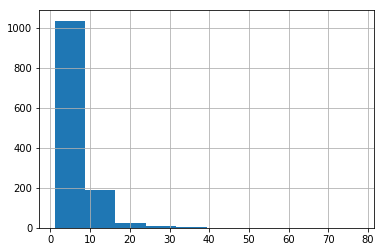

In [80]:
df['wage'].hist();

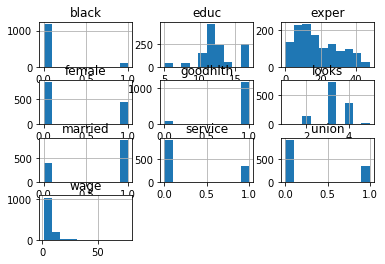

In [79]:
df.hist();

In [81]:
df['female'].unique()

array([1, 0], dtype=int64)

In [82]:
df['female'].nunique()

2

In [83]:
df['female'].value_counts()

0    824
1    436
Name: female, dtype: int64

In [84]:
df['looks'].value_counts() #how much people are attractive

3    722
4    364
2    142
5     19
1     13
Name: looks, dtype: int64

In [86]:
df['goodhlth'].value_counts(normalize=True)

1    0.933333
0    0.066667
Name: goodhlth, dtype: float64

Indexing

In [87]:
df.iloc[0,5] # takes an element which stays at 0th row and 5th column

1

In [88]:
df.iloc[:5,5] #takes first 5 element of 5th column (start counting from 0)

0    1
1    1
2    1
3    0
4    0
Name: female, dtype: int64

In [89]:
df.iloc[:5,5:7] #take 

,female,married
0,1,1
1,1,1
2,1,0
3,0,1
4,0,1


In [97]:
toy_df= pd.DataFrame({'age':[17,46,56], 
                      'salary':[40,50,120]},
                      index=['Kate','Leo','Max'])

In [98]:
toy_df

,age,salary
Kate,17,40
Leo,46,50
Max,56,120


In [99]:
toy_df.iloc[1,1]

50

In [100]:
toy_df.loc[['Leo','Max'],'age']

Leo    46
Max    56
Name: age, dtype: int64

In [101]:
(df['wage']==56).sum() # how much people has 56 salary

0

In [102]:
df[df['wage']>40] # guys with index 269 and 602 has salary more than 40

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
602,77.72,9,1,1,1,1,1,1,13,4


In [105]:
df[(df['wage']>10) & (df['female']==1)] 

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
18,10.44,10,0,1,0,1,0,0,17,4
85,10.12,40,0,1,1,1,0,1,10,3
149,10.62,18,1,1,0,1,1,1,17,3
152,12.12,35,1,0,0,1,0,1,17,3
184,10.22,26,0,1,0,1,0,1,17,3
334,10.53,18,0,1,0,1,1,1,16,3
546,10.12,18,0,1,0,1,0,1,13,3
602,77.72,9,1,1,1,1,1,1,13,4


Apply function

In [107]:
def gender_id_to_string(gender_id):
    return 'female' if gender_id==1 else 'male'

In [109]:
df['female'].apply(gender_id_to_string).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [110]:
df['female'].apply(lambda gender_id: 
                  'female' if gender_id==1 else 'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [112]:
df['female'].map({0:'male',1:'female'}).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [116]:
df.loc[df['female']==0,'wage'].median() #medium salary of male persons

6.41

In [117]:
df.loc[df['female']==1,'wage'].median() #medium salary of female persons

3.75

In [126]:
for (gender_id,sub_df) in df.groupby('female'):
     #print(gender_id)
     #print(sub_df.shape)
    print('Median wages for {} are {}'.format('man' if gender_id==0 else 'woman', sub_df['wage'].median()))

Median wages for man are 6.41
Median wages for woman are 3.75


In [127]:
df.groupby('female')['wage'].median()

female
0    6.41
1    3.75
Name: wage, dtype: float64

In [132]:
df.groupby(['female','married'])['wage'].median()

female  married
0       0          5.065
        1          6.710
1       0          3.890
        1          3.580
Name: wage, dtype: float64

Crosstab

In [135]:
pd.crosstab(df['female'],df['married'])

married,0,1
female,,
0,166,658
1,223,213


In [136]:
import seaborn as sns

In [139]:
df['educ'].value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

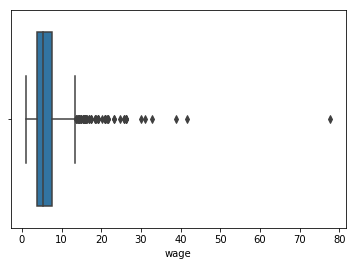

In [140]:
sns.boxplot(x='wage',data=df)

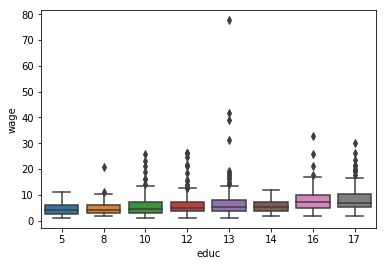

In [141]:
sns.boxplot(x='educ',y='wage',data=df)